In [115]:
# Raeanne Ramharrack
# 816008940
# Tevin Achong
# 816000026

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

import sklearn.model_selection as selection
import sklearn.metrics as metrics
import torch as th
import torch.nn as nn
import torch.optim as optim
import scipy.stats as stats
from sklearn import preprocessing

In [103]:
# Import the dataset
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:, 2:31].values
Y = dataset.iloc[:, 1].values

# ensure both X and Y are numpy arrays
print(type(X), type(Y))

# check sizes
print(X.shape, Y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(569, 29) (569,)


In [104]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [105]:
print('Dimensions: {}'.format(dataset.shape))

Dimensions: (569, 33)


In [106]:
# Finding missing or null data points
dataset.isnull().sum()
dataset.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [107]:
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [108]:
# Using 5-fold validation
accuracies = []

kfold = KFold(5, True, 1)
f1scores = []
for train_idx, test_idx in kfold.split(X):
  x_train, x_test = X[train_idx], X[test_idx]
  y_train, y_test = Y[train_idx], Y[test_idx]

  # Feature scaling
  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  classifier = LogisticRegression(random_state=0, solver='lbfgs')
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  f1scores.append(metrics.f1_score(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)

  total = sum(sum(cm))
  correct = cm[0][0] + cm[1][1]
  accuracy = (correct/total) * 100
  print("Logistic Regression Accuracy: {}%".format(accuracy))

  accuracies.append(accuracy)
    

Logistic Regression Accuracy: 98.24561403508771%
Logistic Regression Accuracy: 94.73684210526315%
Logistic Regression Accuracy: 96.49122807017544%
Logistic Regression Accuracy: 100.0%
Logistic Regression Accuracy: 96.46017699115043%


In [109]:
print('Average Logistic Regression Accuracy {}%'.format(sum(accuracies)/5))

Average Logistic Regression Accuracy 97.18677224033534%


In [110]:
print('KFOLD ANALYSIS\nTHE MEAN F1 SCORE:\t', np.mean(f1scores), '\nSTD DEV F1 SCORE:\t', np.std(f1scores))

KFOLD ANALYSIS
THE MEAN F1 SCORE:	 0.9623089873402446 
STD DEV F1 SCORE:	 0.024863336290685354


In [111]:
# NEURAL NETWORK DESIGN

class MoonModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.loss_func = nn.BCELoss()
        
    def forward(self, X):
        return None 
    
    def loss(self, X, y):
        probs = self.forward(X)
        return self.loss_func(probs, y)
    
    def predict_proba(self, X, as_numpy=False):
        res = self.forward(X)
        if as_numpy:
            res = res.detach().numpy()
        return res
    
    def predict(self, X, threshold=0.5, as_numpy=False):
        probs = self.predict_proba(X, as_numpy)
        return probs > threshold
    
    def fit(self, X, y, epochs=1000, lr=0.1, lam=0):
        optimizer = optim.RMSprop(self.parameters(), lr=lr)
        loss_curve = []
        for _ in range(epochs):
            optimizer.zero_grad()
            loss_val = self.loss(X, y) + self.regularize(lam)
            loss_curve.append(loss_val.data.item())
            loss_val.backward()
            optimizer.step()
        return loss_curve
    
    def regularize(self, lam):
        loss_val = 0
        for p in self.parameters():
            loss_val += lam * th.norm(p)
        return loss_val

In [112]:
class NNModel(MoonModel):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(29, 455, bias=True)
        self.act1 = nn.Sigmoid()
        self.l2 = nn.Linear(455, 1, bias=True)
        self.act2 = nn.Sigmoid()
        
    def get_intermediary(self, X):
        res = self.l1(X)
        res = self.act1(res)
        return res
    
    def forward(self, X):
        res = self.l1(X)
        res = self.act1(res)
        res = self.l2(res)
        res = self.act2(res)
        return res

C:\Users\raean\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


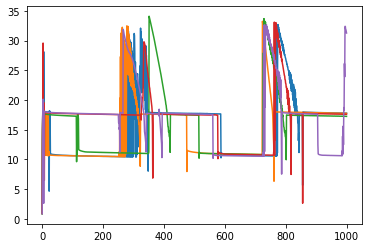

In [113]:
kf = selection.KFold(n_splits=5, shuffle=True)
kf.get_n_splits(X)

NN_f1scores = []

def plot_loss(loss_curve):
    plt.plot(list(range(len(loss_curve))), loss_curve)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    X_train = th.tensor(X_train, dtype=th.float32)
    X_test = th.tensor(X_test, dtype=th.float32)
    y_train = th.tensor(y_train, dtype=th.float32).view(-1, 1)
    y_test = th.tensor(y_test, dtype=th.float32).view(-1, 1)
    
    myNeuralNetwork = NNModel()
    curve = myNeuralNetwork.fit(X_train, y_train, lam=0.01)
    plot_loss(curve)
    y_pred = myNeuralNetwork.predict(X_test, as_numpy=True)
    NN_f1scores.append(metrics.f1_score(y_test, y_pred))

In [114]:
print('NEURAL NETWORKS ANALYSIS\nMEAN FOR F1 SCORES:\t', np.mean(f1_nn1))
print('STD DEV FOR F1 SCORES:\t', np.std(f1_nn1))

NEURAL NETWORKS ANALYSIS
MEAN FOR F1 SCORES:	 0.21910828025477708
STD DEV FOR F1 SCORES:	 0.2683517425214692


# REPORT

We can compare the means and standard deviations of the relevant f1 scores for each model.

A lower std dev on the f1 scores should indicate that the data had a low variance.
Therefore from the means and standard deviations calculated on the f1 scores from each model we can deduce that the Logistic Rgeression model was a better fit for the data.